In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import plotter as p
import jupyter as j
import plotter3 as p3
import importlib
importlib.reload(p)
importlib.reload(j)
importlib.reload(p3)

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/nokia_vodacom/centurycity/quectel/']

custom jupyter @DanielRobinson
custom jupyter @DanielRobinson


In [2]:
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')
# htest = [[]*len(mdb)]
# huenw = [[]*len(mdb[0])]
# hatt = [[]*len(mdb[0][0])]
cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown', 'tab:cyan']

In [14]:
def mdb():
    importlib.reload(p)
    importlib.reload(j)
    files = [['release/release0/*', 'release/release1/*','release/release16/*'],['release/release64/*','release/release128/*'],['release/release256/*','release/release512/*']]
    files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
    files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*'])#, 'cops/tensec/*'])
    files.append(['drx/cap/*'])
    files.append(['ptau/capture/*'])
    dirrs = ['logs/zte_mtn/rf_shield/quectel/', 'logs/zte_mtn/rf_shield/ublox/','logs/nokia_vodacom/centurycity/quectel/', 'logs/nokia_vodacom/centurycity/ublox/']
    # atd = p.attdt()
    mdb = []
    for f in files:
        atd = p.scatternuator('energy_snr_zte_log' + 'ky', 'kx', 'ky', 'thresh', [None]*4, 'scale', 'limited', dirrs, f, mean=True, ttype='return')
        mdb.append(atd)
    return mdb

custom jupyter @DanielRobinson
custom jupyter @DanielRobinson
7 4 5


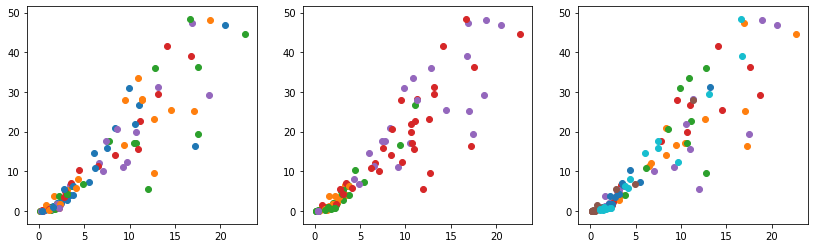

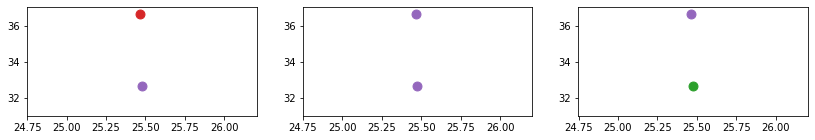

In [5]:
db = mdb()
ky = 'energy'
kx = 'txTime'
hytest = []
hyuenw = []
hyatt = []
hxtest = []
hxuenw = []
hxatt = []
invert = [True, False]
scale = [1000, 1000]
importlib.reload(p)
importlib.reload(j)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
fig = plt.figure(figsize=(14, 2))
ax4 = fig.add_subplot(131)
ax5 = fig.add_subplot(132)
ax6 = fig.add_subplot(133)
for ti, test in enumerate(db):
    hytest.append([])
    hxtest.append([])
    for ui, uenw in enumerate(test):
        if not ti:
            hyuenw.append([])
            hxuenw.append([])
        for ai, att in enumerate(uenw):
            if not ti:
                hyatt.append([])
                hxatt.append([])
            for atd in [uenw[att]]:
                try:
                    try:
                        # main
                        rx = j.threshold(atd, kx)
                        ry = j.threshold(atd, ky)
                        r = rx * ry
                        x = np.array(atd[kx][r])/scale[0]
                        y = np.array(atd[ky][r])/scale[1]
                        ax1.scatter(x, y, color=cc[ai])
                        ax2.scatter(x, y, color=cc[ui])
                        ax3.scatter(x, y, color=cc[ti])
                        if y.size:
                            hy = np.mean(y)
                            hytest[ti].append(hy)
                            hyuenw[ui].append(hy)
                            hyatt[ai].append(hy)
                        if x.size:
                            hx = np.mean(x)
                            hxtest[ti].append(hx)
                            hxuenw[ui].append(hx)
                            hxatt[ai].append(hx)
                        
                        # outliers
                        rx = np.invert(rx) if invert[0] else rx
                        ry = np.invert(ry) if invert[1] else ry
                        r = rx * ry
                        x = np.array(atd[kx][r])/scale[0]
                        y = np.array(atd[ky][r])/scale[1]
                        ms=80
                        ax4.scatter(x, y, color=cc[ai], s=ms)
                        ax5.scatter(x, y, color=cc[ui], s=ms)
                        ax6.scatter(x, y, color=cc[ti], s=ms)
                    except TypeError as e:
                        print(e, atd[kx])
                except (KeyError, TypeError) as e:
                    pass
                
print(ti+1, ui+1, ai+1)

ky energy


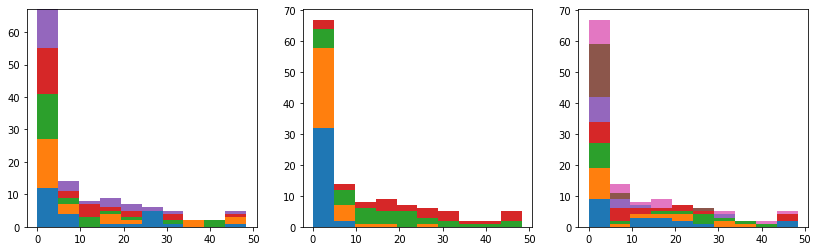

kx txTime


([array([6., 3., 2., 2., 2., 1., 0., 3., 0., 1.]),
  array([13.,  6.,  3.,  3.,  6.,  3.,  0.,  3.,  0.,  1.]),
  array([20.,  8.,  3.,  4.,  9.,  3.,  2.,  4.,  1.,  1.]),
  array([27., 11.,  3.,  5., 13.,  4.,  2.,  5.,  2.,  2.]),
  array([32., 17.,  4.,  5., 13.,  5.,  2.,  5.,  2.,  2.]),
  array([49., 18.,  5.,  5., 14.,  5.,  2.,  5.,  2.,  2.]),
  array([57., 21.,  6.,  7., 15.,  6.,  2.,  7.,  2.,  2.])],
 array([ 0.147,  2.399,  4.651,  6.903,  9.155, 11.407, 13.659, 15.911,
        18.163, 20.415, 22.668]),
 <a list of 7 Lists of Patches objects>)

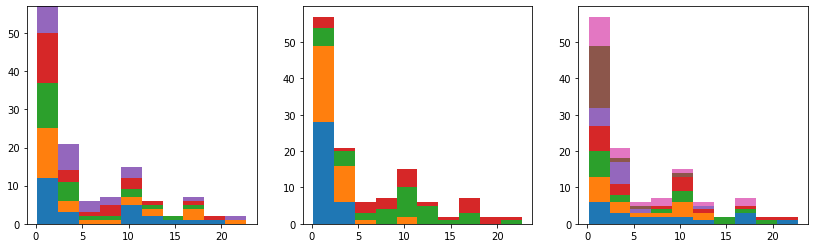

In [7]:
print('ky', ky)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(hyatt, stacked=True)
ax2.hist(hyuenw, stacked=True)
ax3.hist(hytest, stacked=True)
plt.show()
print('kx', kx)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(hxatt, stacked=True)
ax2.hist(hxuenw, stacked=True)
ax3.hist(hxtest, stacked=True)

custom jupyter @DanielRobinson
custom jupyter @DanielRobinson
7 4 5
ky ECL


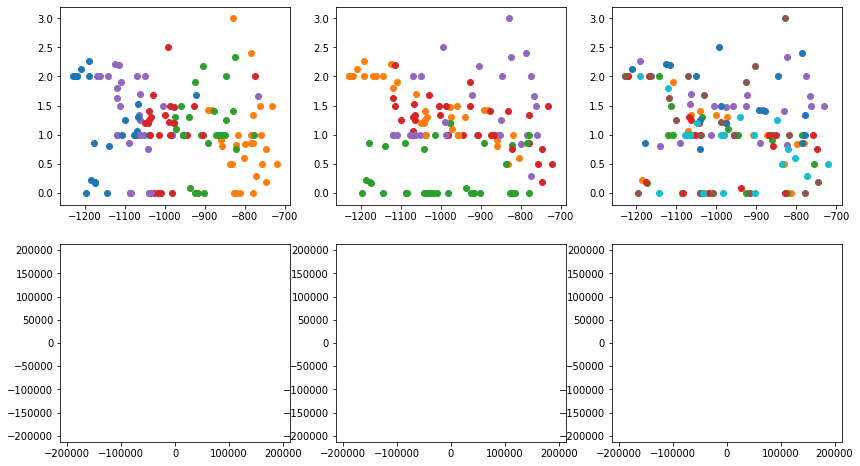

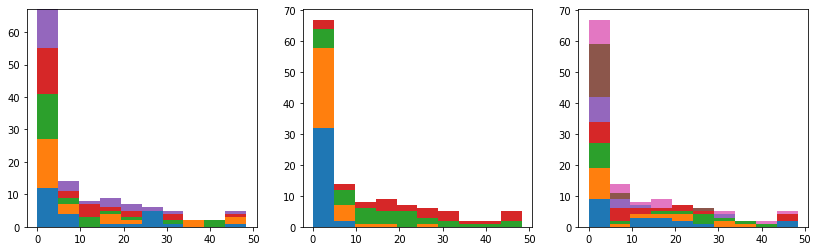

kx Signal power


([array([6., 3., 2., 2., 2., 1., 0., 3., 0., 1.]),
  array([13.,  6.,  3.,  3.,  6.,  3.,  0.,  3.,  0.,  1.]),
  array([20.,  8.,  3.,  4.,  9.,  3.,  2.,  4.,  1.,  1.]),
  array([27., 11.,  3.,  5., 13.,  4.,  2.,  5.,  2.,  2.]),
  array([32., 17.,  4.,  5., 13.,  5.,  2.,  5.,  2.,  2.]),
  array([49., 18.,  5.,  5., 14.,  5.,  2.,  5.,  2.,  2.]),
  array([57., 21.,  6.,  7., 15.,  6.,  2.,  7.,  2.,  2.])],
 array([ 0.147,  2.399,  4.651,  6.903,  9.155, 11.407, 13.659, 15.911,
        18.163, 20.415, 22.668]),
 <a list of 7 Lists of Patches objects>)

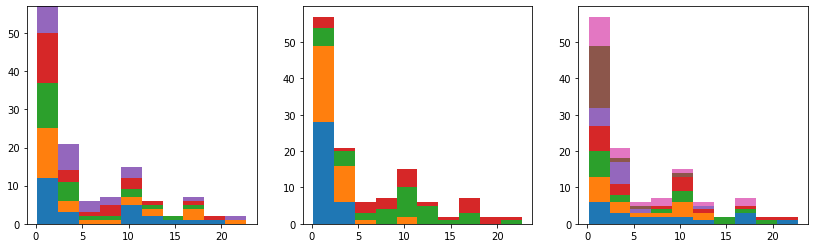

In [15]:
ky = 'ECL'
kx = 'Signal power'
db = mdb()
invert = [False, True]
importlib.reload(p)
importlib.reload(j)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
for ti, test in enumerate(db):
    for ui, uenw in enumerate(test):
        for ai, att in enumerate(uenw):
            for atd in [uenw[att]]:
                try:
                    try:
                        # main
                        rx = j.threshold(atd, kx)
                        ry = j.threshold(atd, ky)
                        r = rx * ry
                        x = atd[kx][r]
                        y = atd[ky][r]
                        ax1.scatter(x, y, color=cc[ai])
                        ax2.scatter(x, y, color=cc[ui])
                        ax3.scatter(x, y, color=cc[ti])
                        
                        # outliers
                        rx = np.invert(rx) if invert[0] else rx
                        ry = np.invert(ry) if invert[1] else ry
                        r = rx * ry
                        x = atd[kx][r]
                        y = atd[ky][r]
                        ax4.scatter(x, y, color=cc[ai])
                        ax5.scatter(x, y, color=cc[ui])
                        ax6.scatter(x, y, color=cc[ti])
                    except TypeError as e:
                        print(e, atd[kx])
                except (KeyError, TypeError) as e:
                    pass
                
print(ti+1, ui+1, ai+1)

print('ky', ky)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(hyatt, stacked=True)
ax2.hist(hyuenw, stacked=True)
ax3.hist(hytest, stacked=True)
plt.show()
print('kx', kx)
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(hxatt, stacked=True)
ax2.hist(hxuenw, stacked=True)
ax3.hist(hxtest, stacked=True)

# #Latency

custom jupyter @DanielRobinson


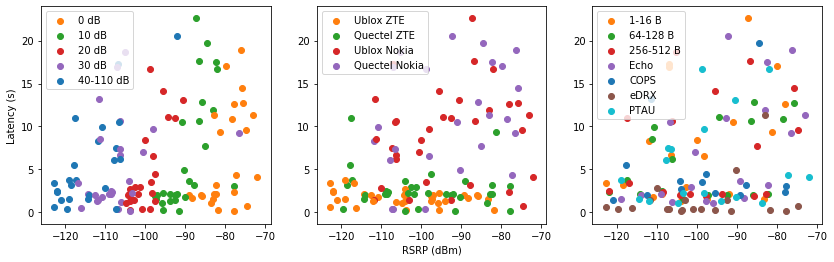

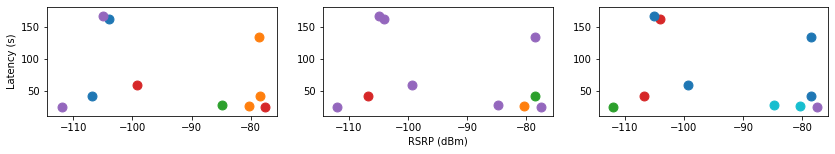

7 4 5
ky txTime


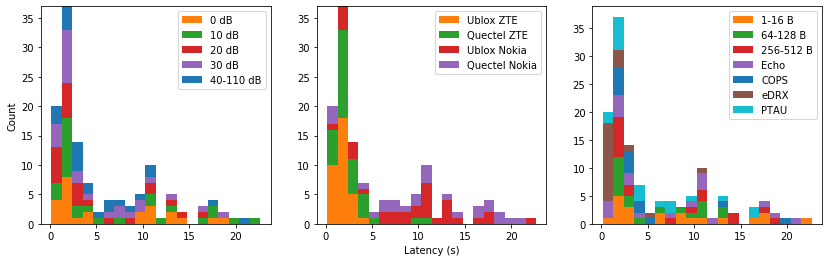

In [138]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'txTime', 'RSRP (dBm)', 'Latency (s)', scale=[10,1000], invert=[False, True])
p3.hist()

custom jupyter @DanielRobinson


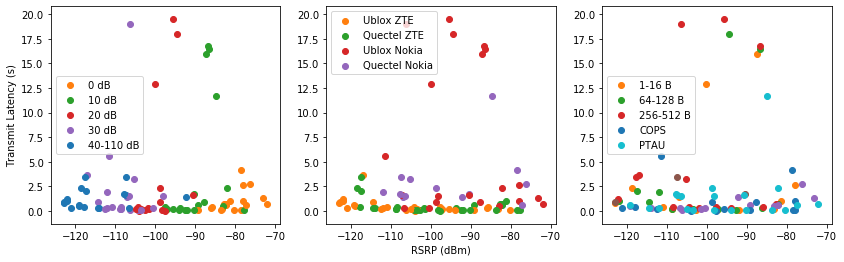

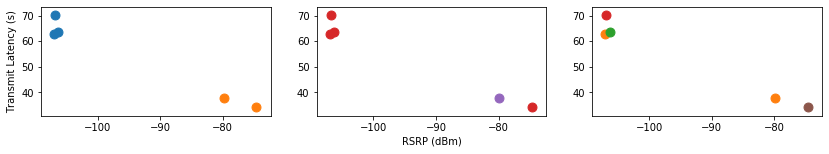

7 4 5
ky txTimeNW


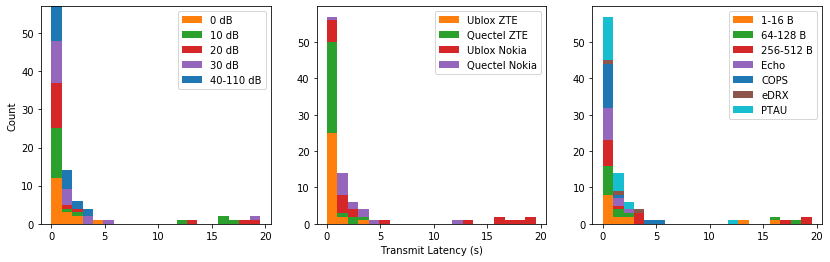

In [162]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'txTimeNW', 'RSRP (dBm)', 'Transmit Latency (s)', scale=[10,1000], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


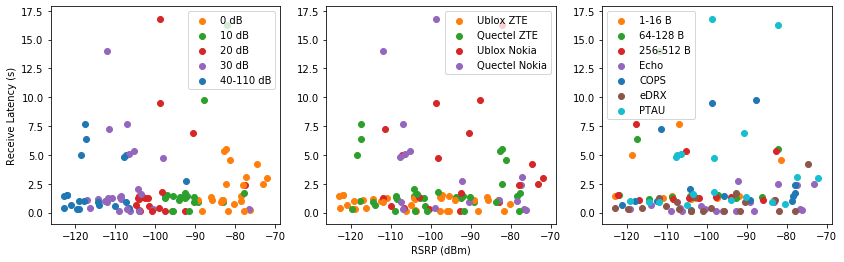

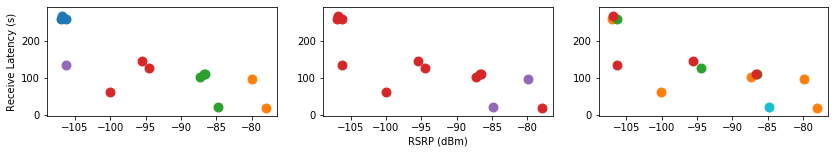

7 4 5
ky rxTimeNW


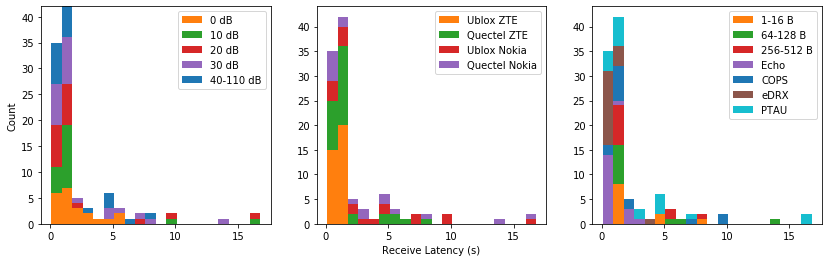

In [161]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'rxTimeNW', 'RSRP (dBm)', 'Receive Latency (s)', scale=[10,1000], invert=[False, True])
p3.hist(False)

# #Power saving

custom jupyter @DanielRobinson


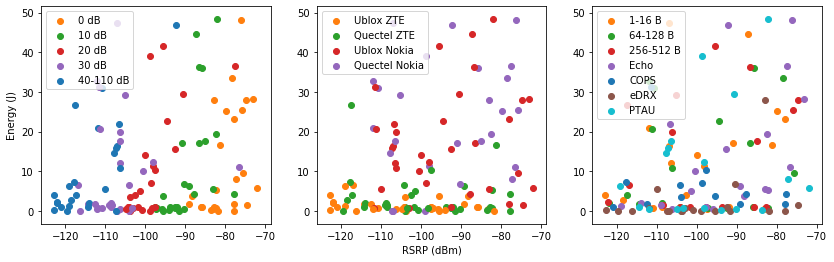

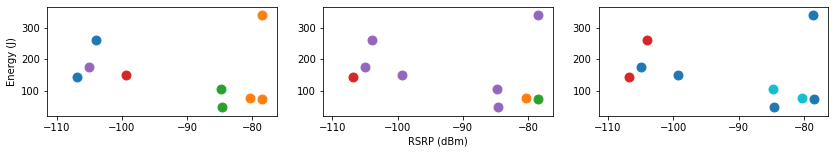

7 4 5
ky energy


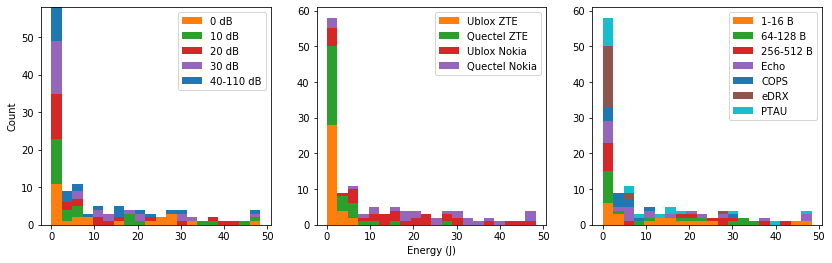

kx Signal power


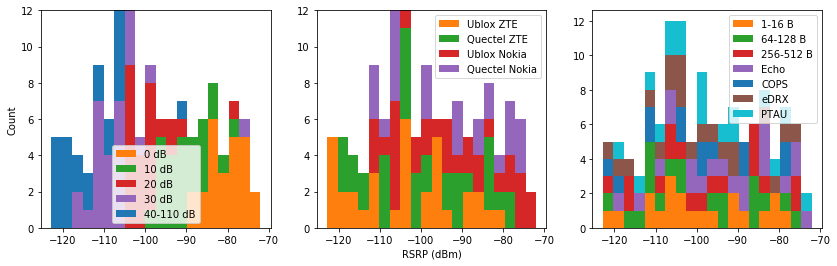

In [108]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'energy', 'RSRP (dBm)', 'Energy (J)', [10,1000], [False, True])
p3.hist(True)

custom jupyter @DanielRobinson


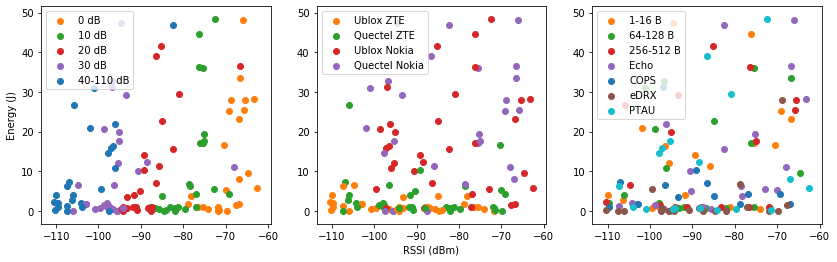

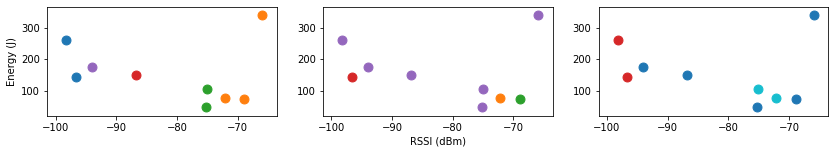

7 4 5
ky energy


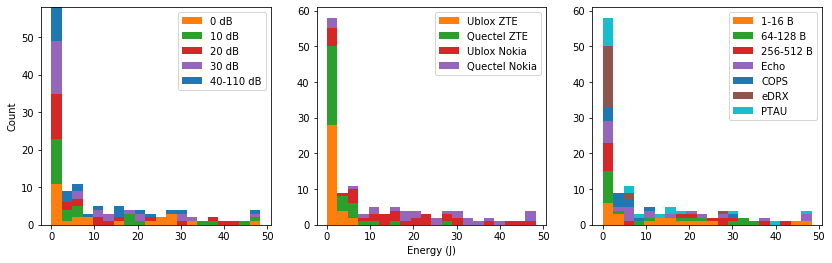

In [139]:
importlib.reload(p3)
p3.plot(mdb, 'Total power', 'energy', 'RSSI (dBm)', 'Energy (J)', scale=[10,1000], invert=[False, True])
p3.hist()

custom jupyter @DanielRobinson


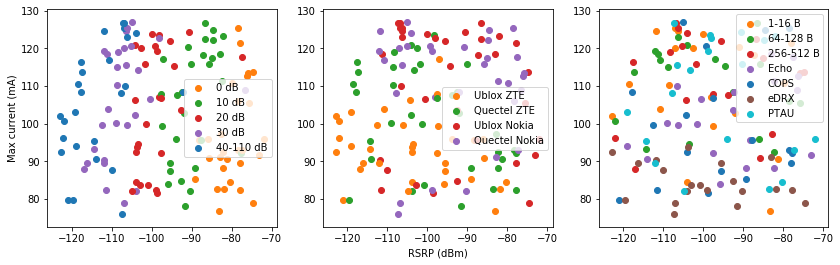

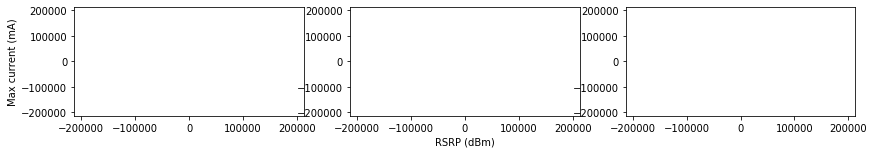

7 4 5
ky maxCurrent


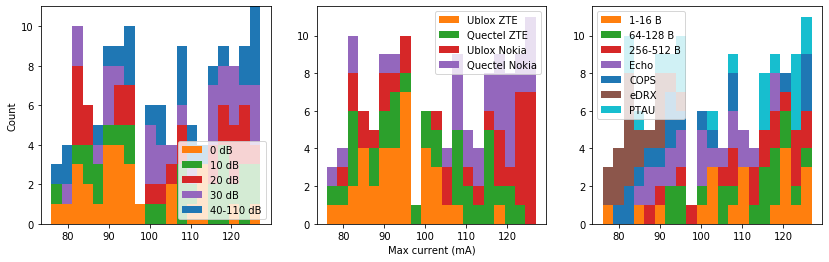

In [177]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'maxCurrent', 'RSRP (dBm)', 'Max current (mA)', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


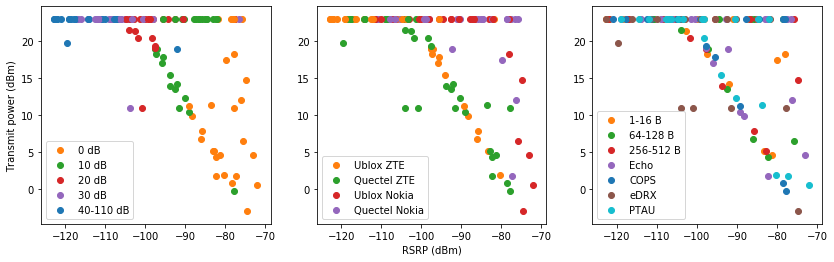

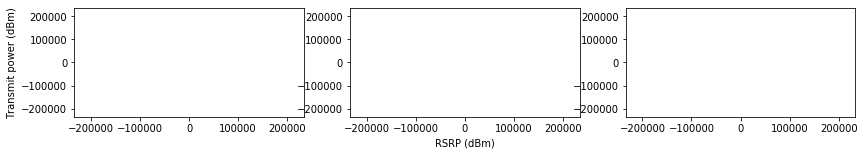

7 4 5
ky TX power


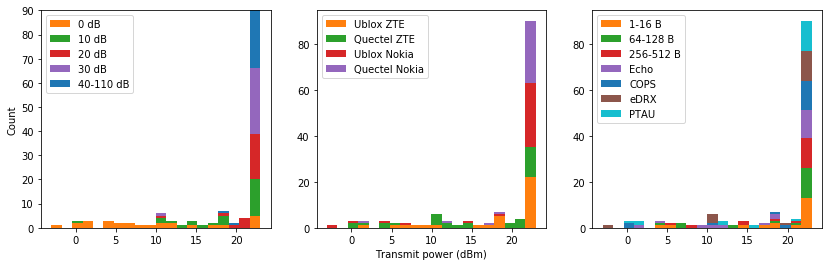

kx Signal power


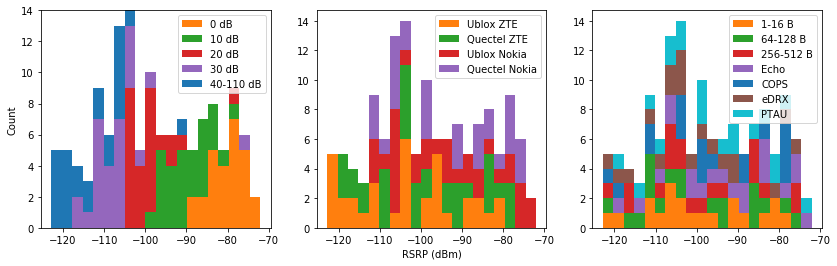

In [112]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'TX power', 'RSRP (dBm)', 'Transmit power (dBm)', scale=[10,10], invert=[False, True])
p3.hist(True)

custom jupyter @DanielRobinson


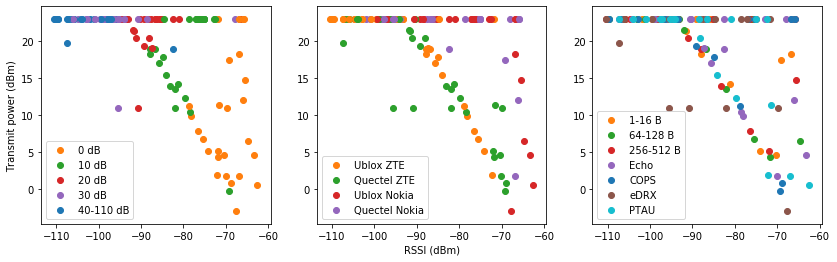

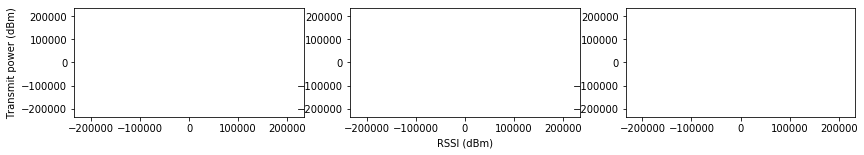

7 4 5
ky TX power


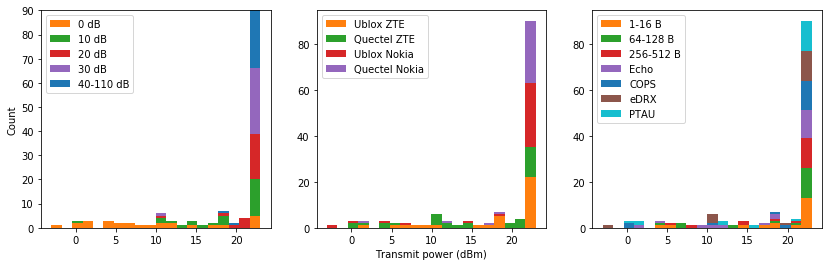

In [137]:
importlib.reload(p3)
p3.plot(mdb, 'Total power', 'TX power', 'RSSI (dBm)', 'Transmit power (dBm)', scale=[10,10], invert=[False, True])
p3.hist()

custom jupyter @DanielRobinson


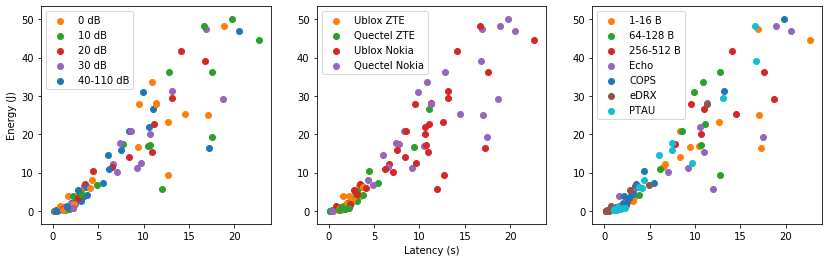

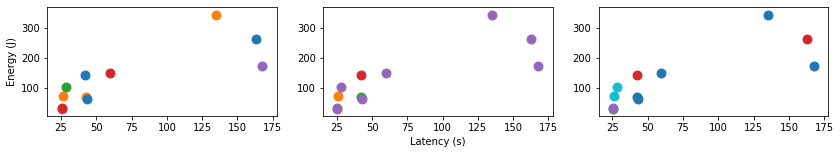

7 4 5
ky energy


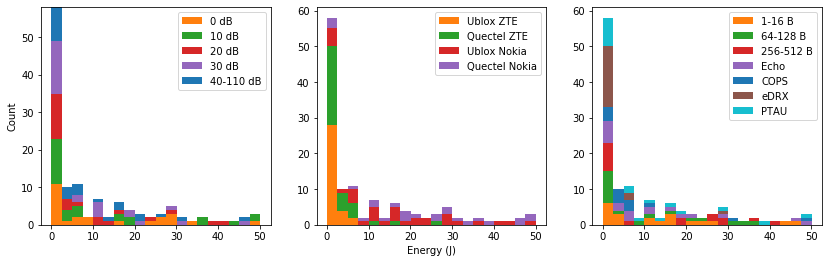

kx txTime


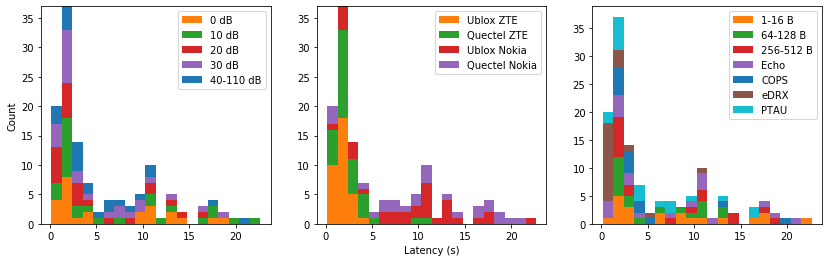

In [98]:
importlib.reload(p3)
p3.plot(mdb(), 'txTime', 'energy', 'Latency (s)', 'Energy (J)', [1000,1000], [True, False])
p3.hist(True)

# #RF Receive metrics

custom jupyter @DanielRobinson


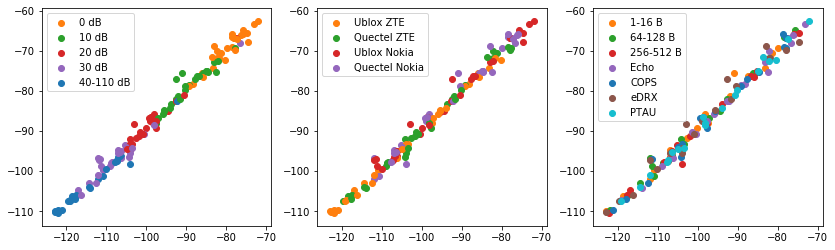

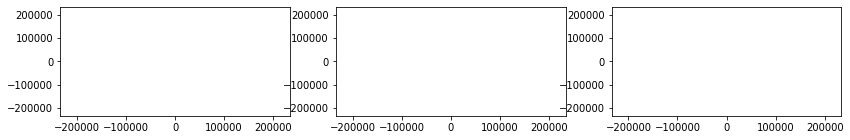

7 4 5
ky Total power


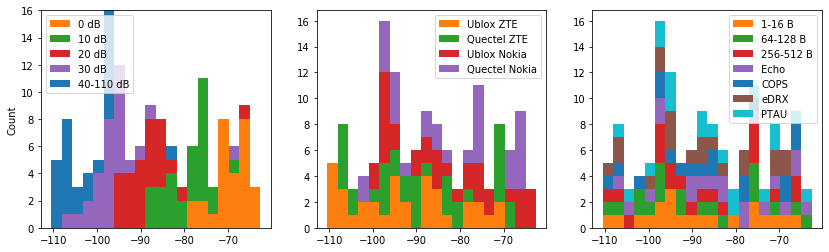

kx Signal power


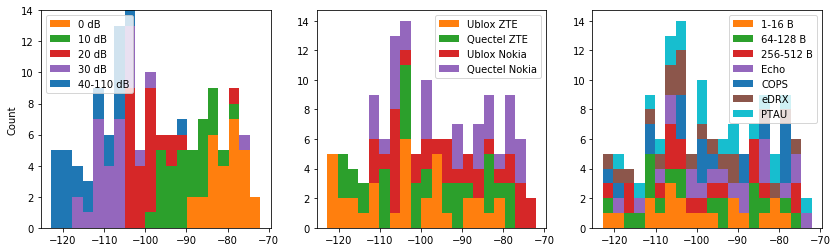

In [116]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'Total power', scale=[10,10], invert=[False, True])
p3.hist(True)

custom jupyter @DanielRobinson


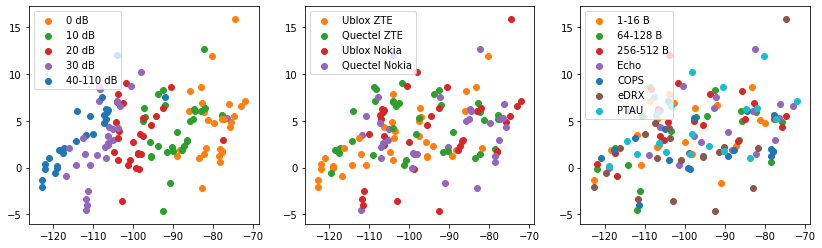

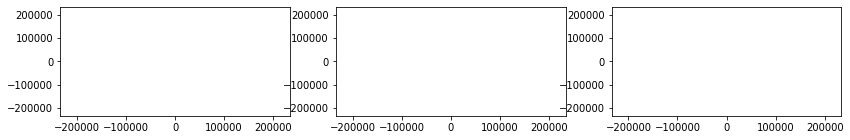

7 4 5
ky SNR


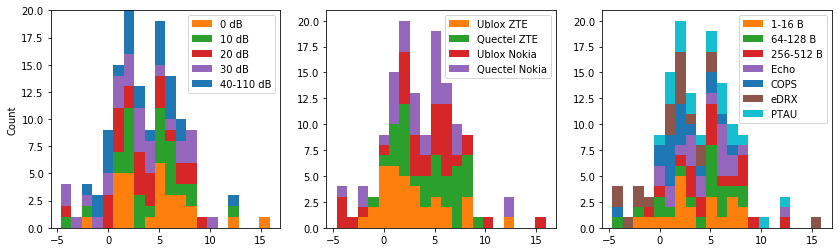

kx Signal power


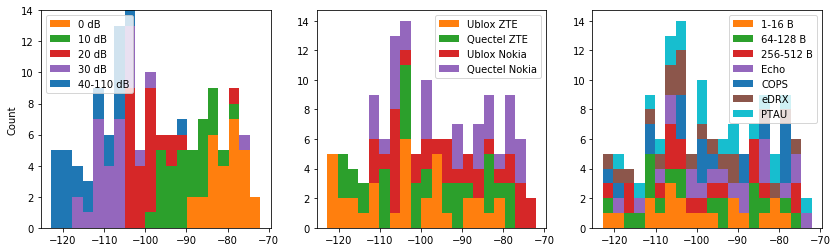

In [134]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'SNR', scale=[10,10], invert=[False, True])
p3.hist(True)

custom jupyter @DanielRobinson


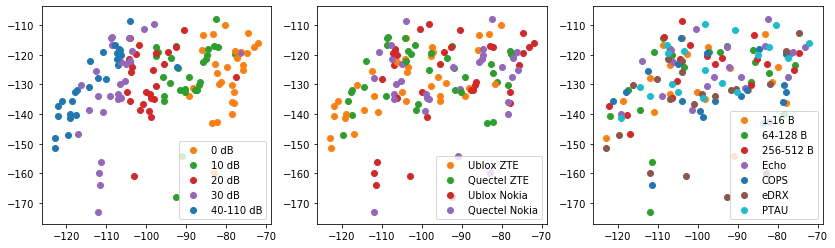

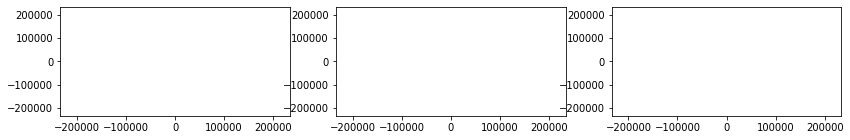

7 4 5
ky RSRQ


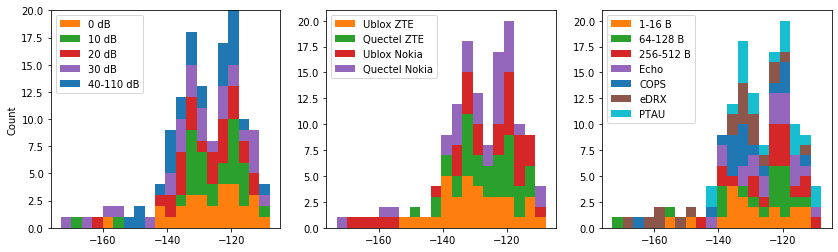

kx Signal power


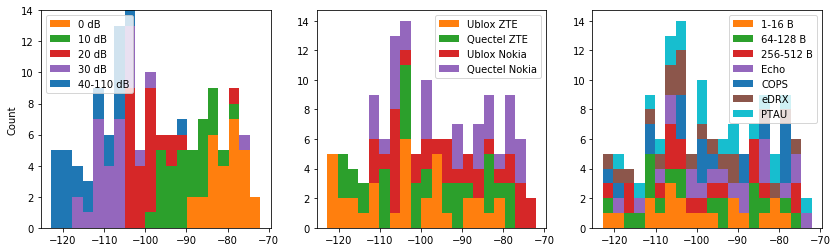

In [136]:
importlib.reload(p3)
p3.plot(mdb, 'Signal power', 'RSRQ', scale=[10,1], invert=[False, True])
p3.hist(True)

# #Packet metrics

custom jupyter @DanielRobinson


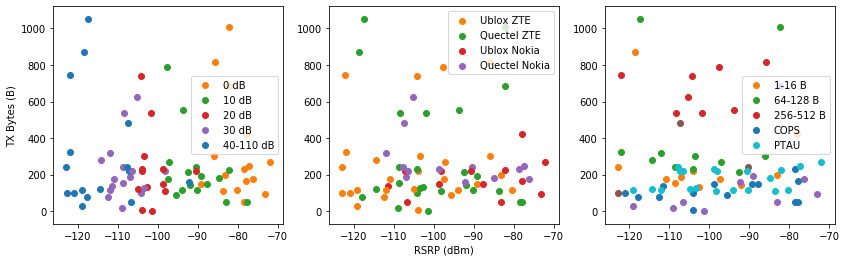

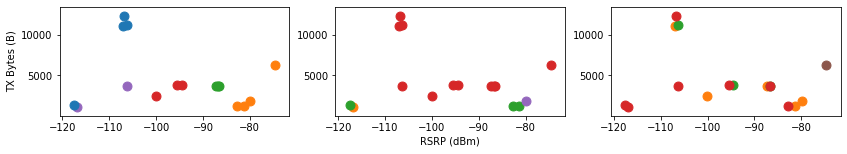

7 4 5
ky txBytes


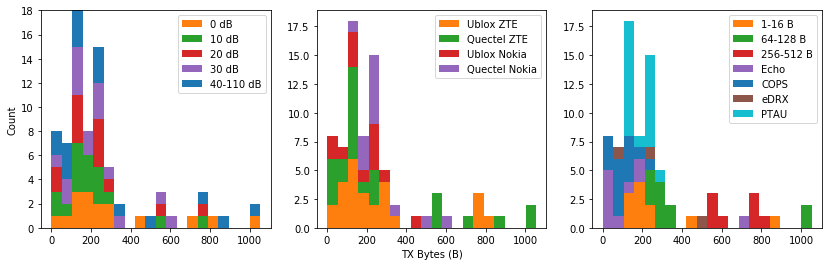

In [151]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'txBytes', 'RSRP (dBm)', 'TX Bytes (B)', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


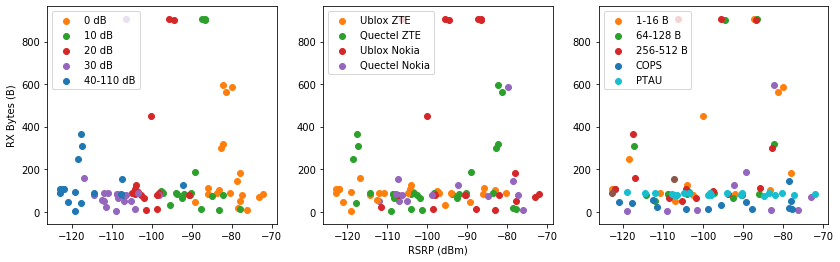

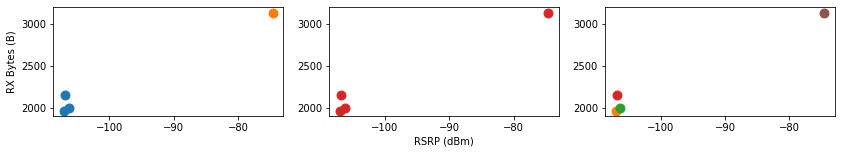

7 4 5
ky rxBytes


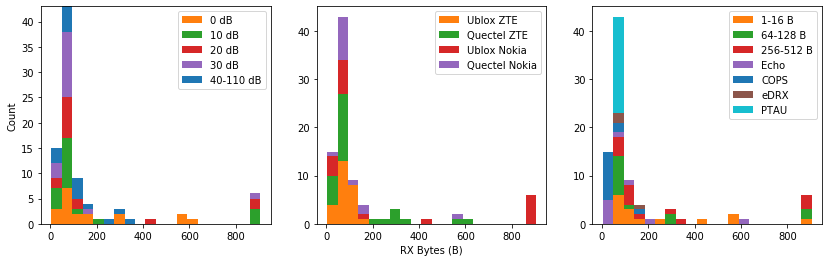

In [154]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'rxBytes', 'RSRP (dBm)', 'RX Bytes (B)', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


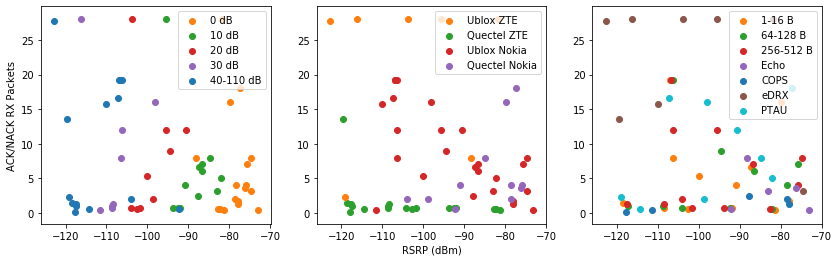

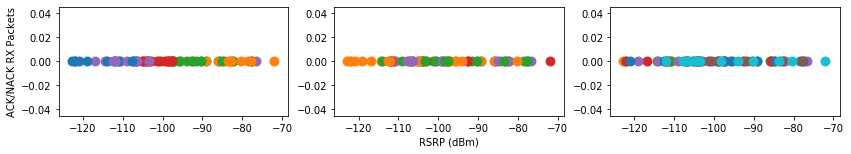

7 4 5
ky Total ACK NACK RX


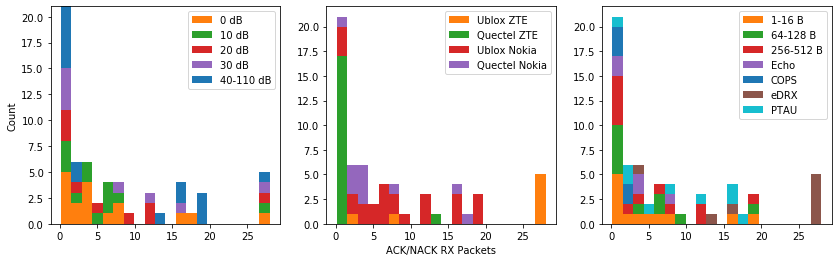

In [176]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'Total ACK NACK RX', 'RSRP (dBm)', 'ACK/NACK RX Packets', scale=[10,1], invert=[False, True])
p3.hist(False)

# #Network metrics

custom jupyter @DanielRobinson


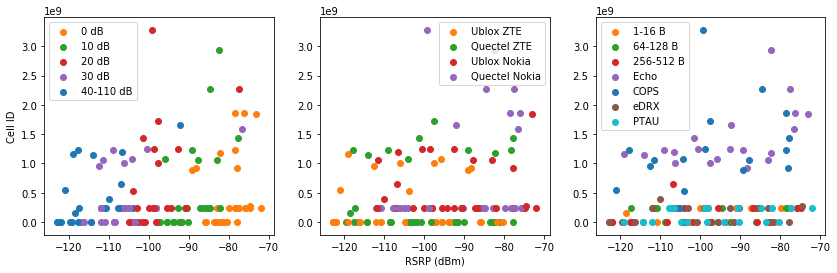

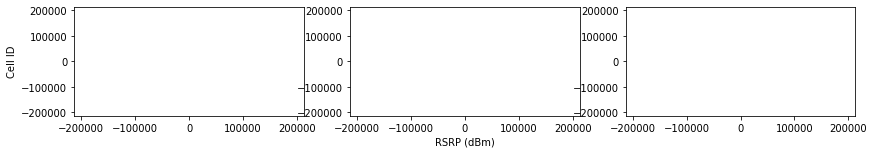

7 4 5
ky Cell ID


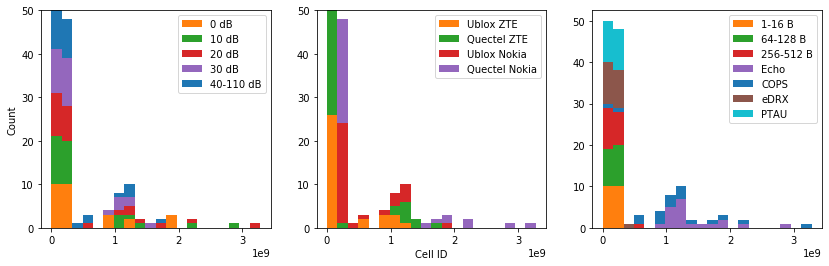

In [178]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'Cell ID', 'RSRP (dBm)', 'Cell ID', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


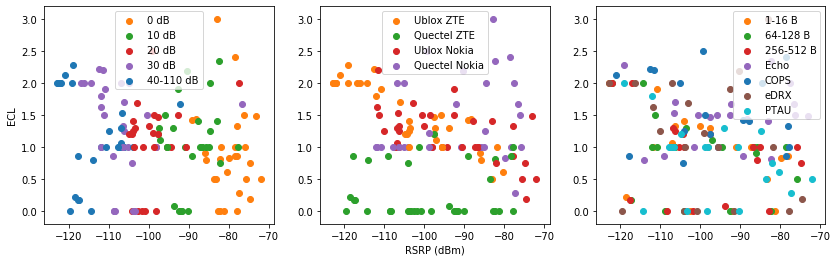

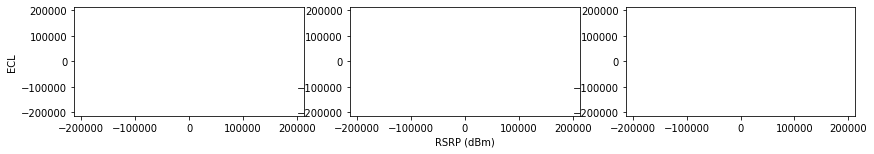

7 4 5
ky ECL


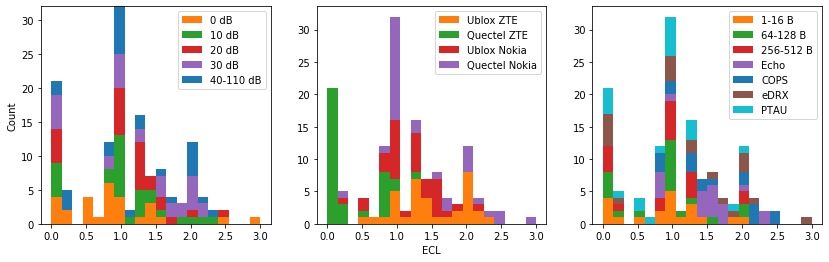

In [179]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'ECL', 'RSRP (dBm)', 'ECL', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


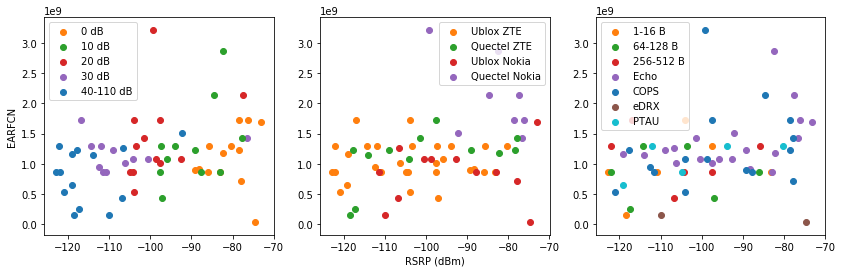

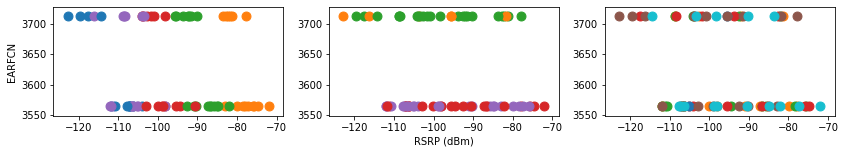

7 4 5
ky EARFCN


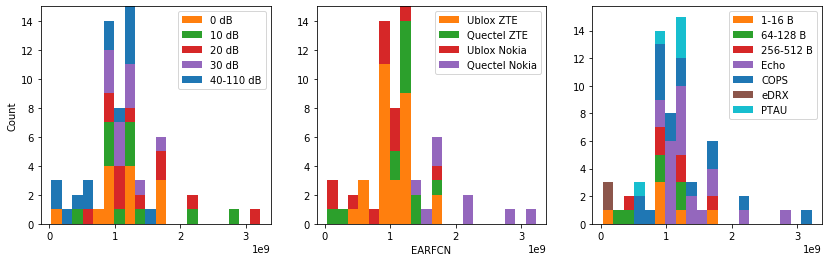

In [182]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'EARFCN', 'RSRP (dBm)', 'EARFCN', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


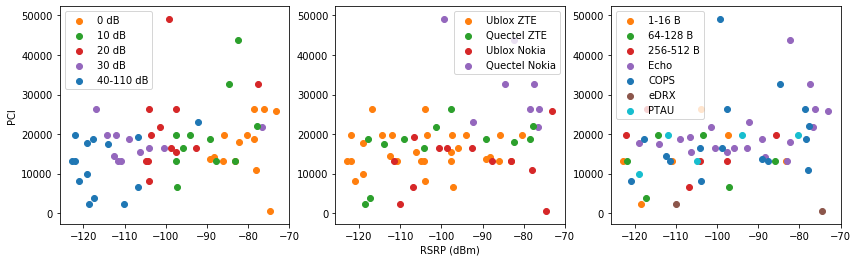

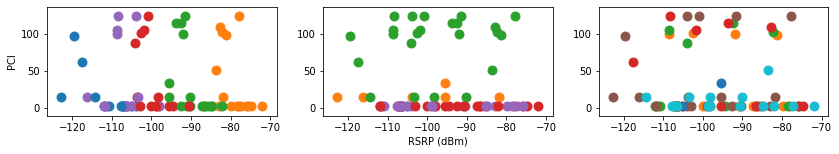

7 4 5
ky PCI


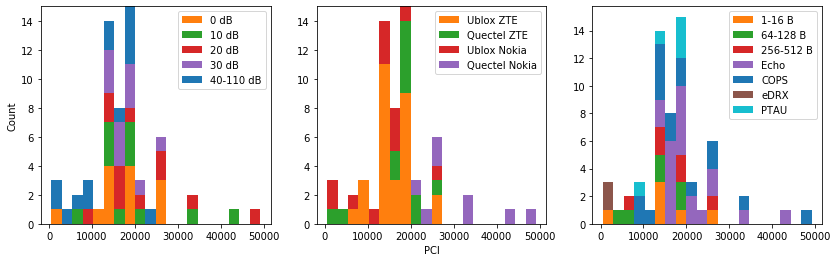

In [187]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'PCI', 'RSRP (dBm)', 'PCI', scale=[10,1], invert=[False, True])
p3.hist(False)

# #Memory

custom jupyter @DanielRobinson


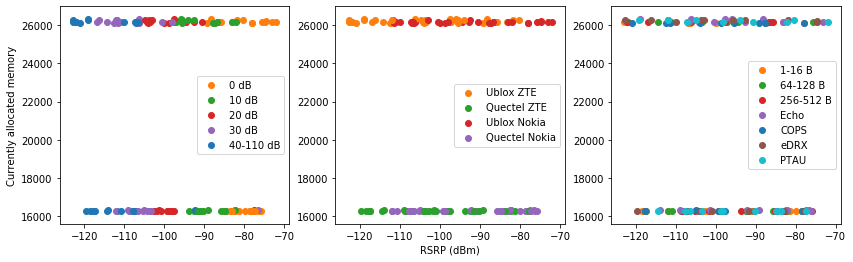

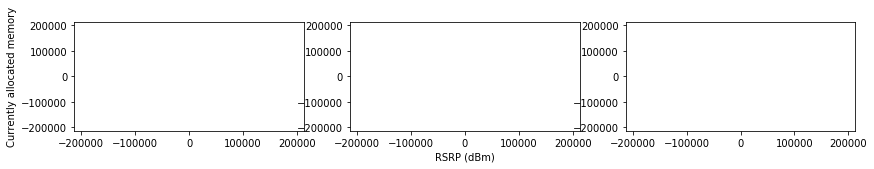

7 4 5
ky Current Allocated


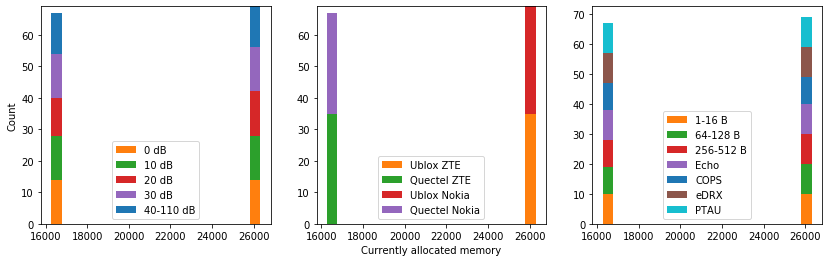

In [7]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'Current Allocated', 'RSRP (dBm)', 'Currently allocated memory', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


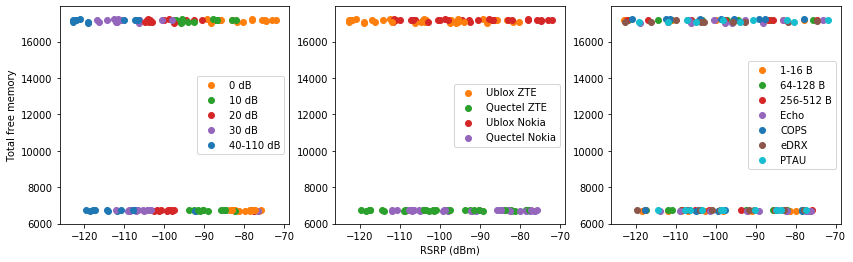

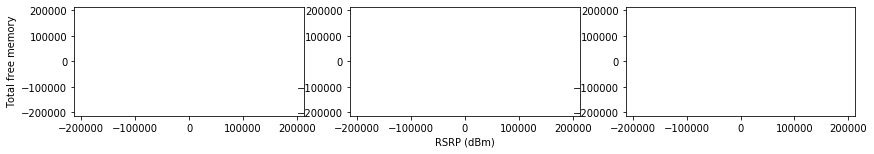

7 4 5
ky Total Free


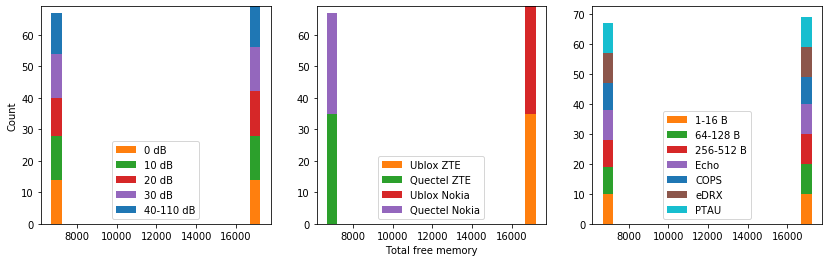

In [9]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'Total Free', 'RSRP (dBm)', 'Total free memory', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


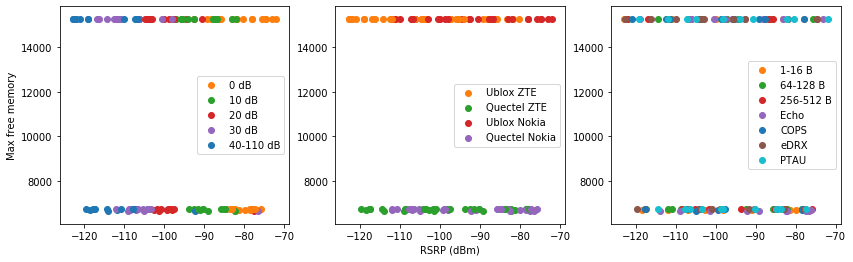

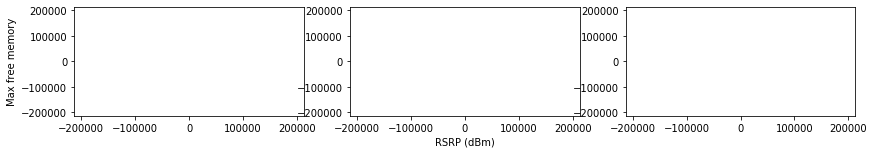

7 4 5
ky Max Free


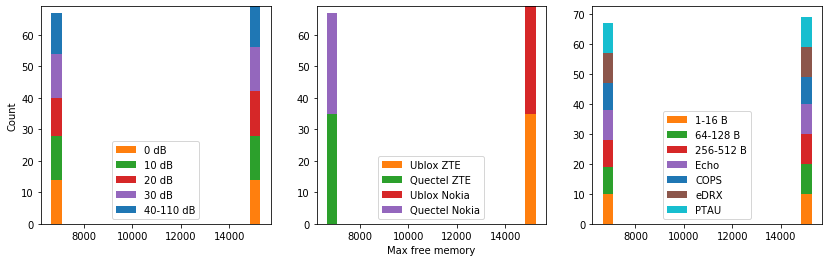

In [10]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'Max Free', 'RSRP (dBm)', 'Max free memory', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


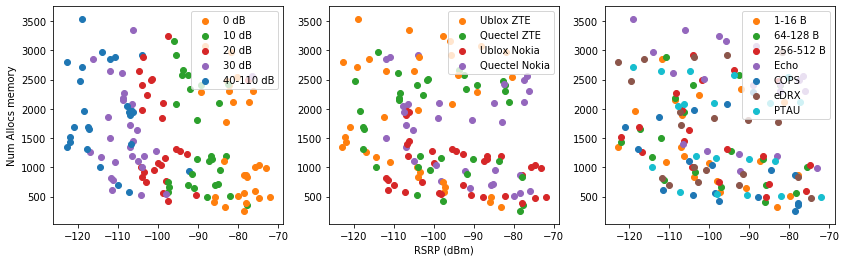

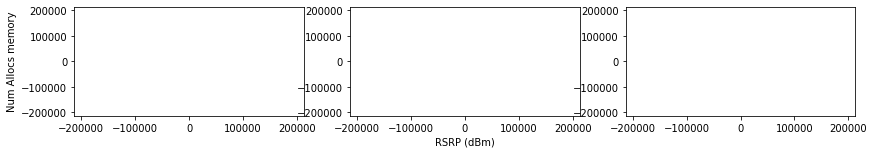

7 4 5
ky Num Allocs


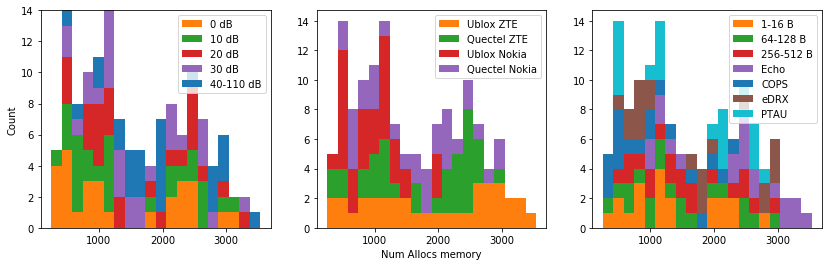

In [11]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'Num Allocs', 'RSRP (dBm)', 'Num Allocs memory', scale=[10,1], invert=[False, True])
p3.hist(False)

custom jupyter @DanielRobinson


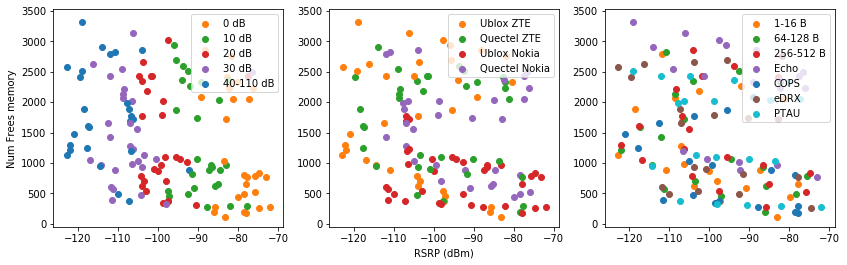

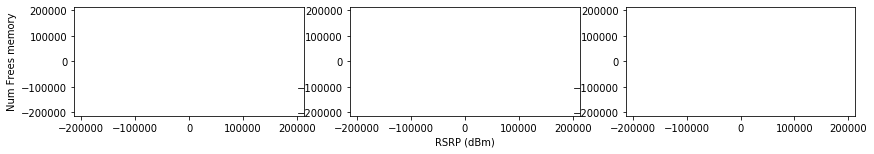

7 4 5
ky Num Frees


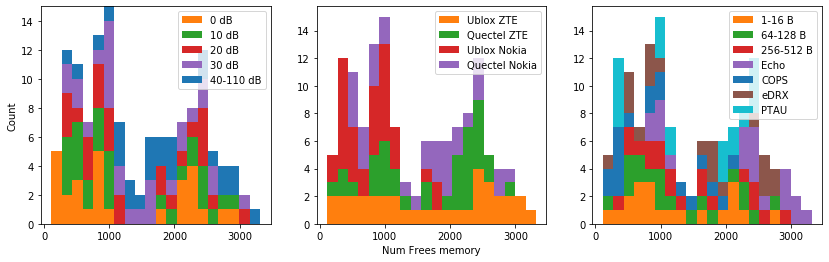

In [14]:
importlib.reload(p3)
p3.plot(mdb(), 'Signal power', 'Num Frees', 'RSRP (dBm)', 'Num Frees memory', scale=[10,1], invert=[False, True])
p3.hist(False)